## Decision Tree and Random Forests

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


Making some dataset using builtin function in Scikit Learn library. I'll make 4 blubs each contains 125 datapoints. I would consider the standard deviaton of the clusters such that they are not totally mix and also not completely seperate (consider a small porttion of overlap).

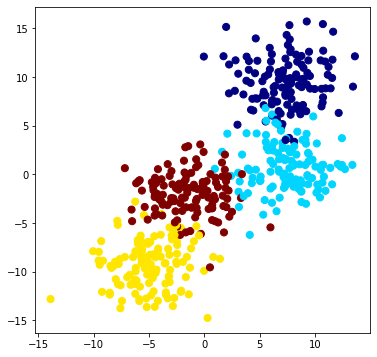

In [3]:
# make dataset as couple of blobs

from sklearn.datasets import make_blobs

# make 4 blobs total including 125x4 = 500 datapoints.
X,y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

# plot bolbs
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='jet')

Importing decision tree from sklearn library:


In [4]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

Before applying the decision tree classifer to classify the datapoints, we need some functions for visualization.

In [5]:
def visualize_tree(classifier, X, y, boundaries=True):
    '''
    Function for applying the decision tree classifier and visualizing the output of the predictions and draw corresponding boundaries

    Args:
        classifier  (): the classifier model which is used for the dicision tree
        X           (): training datapoints
        y           (): training classes 
        boundaries  (bol): True if you want to draw boundaries, else False
    
    Raises:

    Returns:
        No variable returns
        Plot datapoints + classified regions in different colors + boundaries if the corresponding argument is True
    '''

    # Fit the X and y data to the tree
    classifier.fit(X, y)

    # Automatically set the x and y limits to the data (+/- 0.1)
    xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)

    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries

        Args:
            i   (): 
            xlim():
            ylim():

        Raises:

        Returns:
            No variable returns
            Plot boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In the next step we'll try decision tree with maximum depth of 2 branches. 

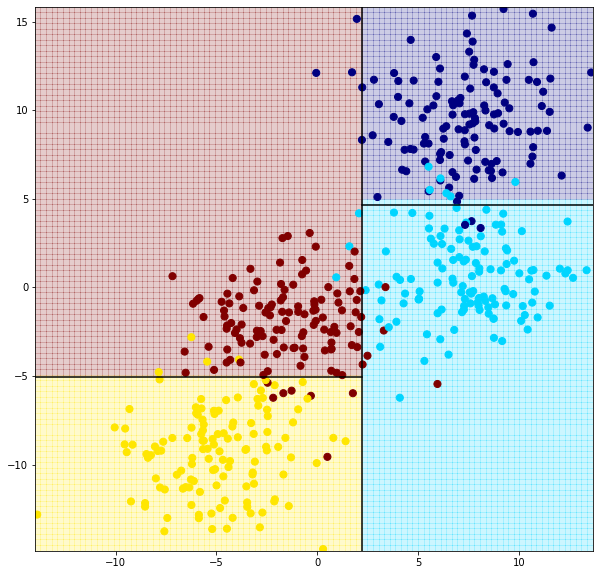

In [6]:
# Set model variable
dtc = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(dtc,X,y)

Lets check what would be happend if we set the maximum depth of 4 for branching. You will see that overfitting would be happend.

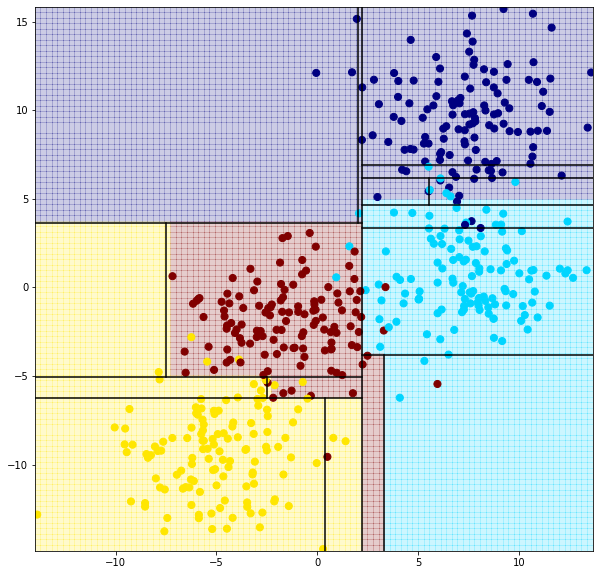

In [7]:
# Set model variable
dtc = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries
visualize_tree(dtc,X,y)

To resolve this issue we can use an ensemble of decision trees. 

## Random Forests

In the next section we will use random forst as one of the most common ensemble methods. By averaging the results of many individual estimators the results would be much more roboust and accurate. 

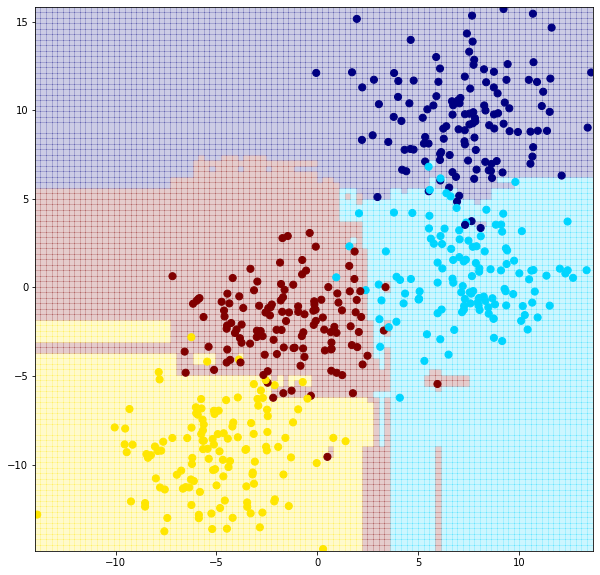

In [10]:
# Import random farest classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random forest classifier with 100 ensembles
rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# Visualize the classification result
# Set boundaries to false to avoid error
visualize_tree(rfc,X,y,boundaries=False)

## Random Forest Regression

We can also use Random Forests for regression. 

To setup the data, imagine that we have a sinusoidal signal with a noise. We can consider a slow oscillation components, a fast one and also a noise. 

<ErrorbarContainer object of 3 artists>

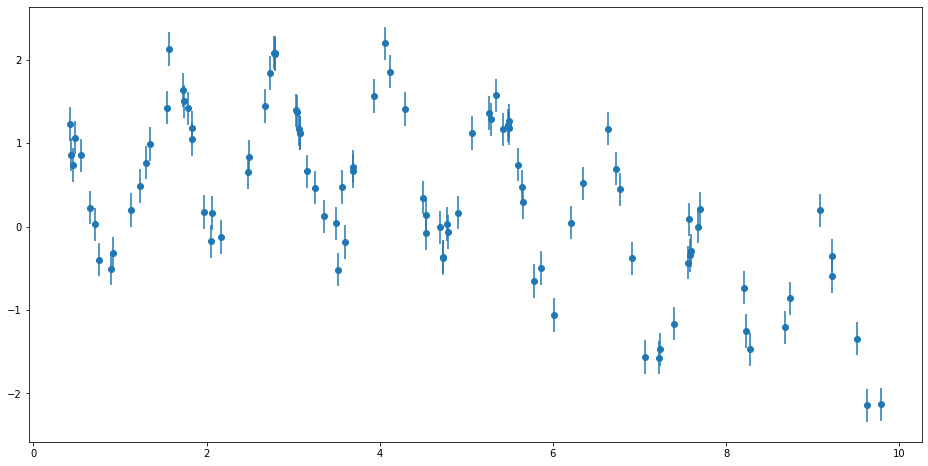

In [13]:
# Import Random Forests Regression
from sklearn.ensemble import RandomForestRegressor

# Setup data
# X values
X = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis.

    Args:
        x           (): the input variables (datapoints)
        sigma       (): standard deviation of the applied noise
    Raises:

    Returns:
        signal      (): noisy sinusoidal signal with slow and fast oscillation components
    '''
   
    noise = sigma * np.random.randn(len(x))
    signal = np.sin(5 * x) + np.sin(0.5 * x) + noise
    
    return signal

# Call y for data with x
y = sin_model(X)

# Plot y vs x
plt.figure(figsize=(16,8))
plt.errorbar(X, y, 0.2, fmt='o')

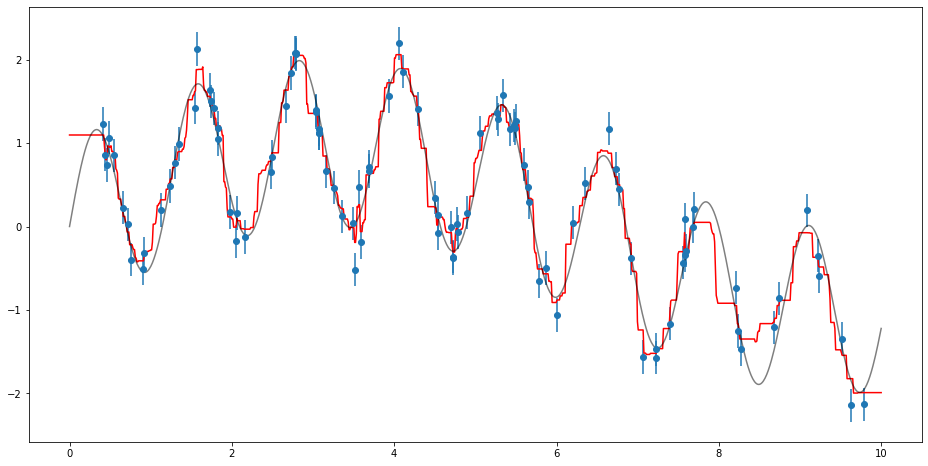

In [17]:
# X points
xfit = np.linspace(0, 10, 1000)

# Seting up the model with 100 estimators
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(X[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(X, y, 0.2, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

As you can see above using random forests regression we can have almost a nice fit to such a sinusoidal signal which almost wasn't easy to achieve by polynomial of sinusoidal fit. This shows the flexibility and roboustness of the random forests method.